# Training models for numerical data

This workbook illustrates how we can train a machine learning model for numerical data, with the focus on the visualization of the model. 

We train a CART decision tree model since we can explore how the model recognized the pattern in the data and how it could re-create it. 

In [3]:
# access google drive with code
# we import the library that helps us to connect to Google Drive
from google.colab import drive

# we connect to the google drive
drive.mount('/content/gdrive/')

# and we enter the folder where I stored the data
%cd '/content/gdrive/My Drive/ds/'

Mounted at /content/gdrive/
/content/gdrive/My Drive/ds


In [11]:
# read the file with data using openpyxl
import pandas as pd

# we read the data from the excel file, 
# which is the defect data from the ant 1.3 system
dfDataAnt13 = pd.read_excel('./chapter_6_dataset_numerical.xlsx', 
                            sheet_name='ant_1_3',
                            index_col=0)

In [12]:
dfDataAnt13.head()

,CBO,DCC,ExportCoupling,ImportCoupling,NOM,WMC,Defect
ClassName,,,,,,,
org.apache.tools.ant.AntClassLoader,9,2,7,2,13,41,1
org.apache.tools.ant.BuildEvent,6,3,5,3,8,8,0
org.apache.tools.ant.BuildException,80,1,79,1,7,9,0
org.apache.tools.ant.BuildListener,1,1,1,1,7,7,0
org.apache.tools.ant.BuildLogger,1,0,1,0,4,4,0


In [13]:
# prepare the dataset
import sklearn.model_selection

X = dfDataAnt13.drop(['Defect'], axis=1)
y = dfDataAnt13.Defect

X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(X, y, random_state=42, train_size=0.9)

In [15]:
# now that we have the data prepared
# we import the decision tree classifier and train it
from sklearn.tree import DecisionTreeClassifier

# first we create an empty classifier
decisionTreeModel = DecisionTreeClassifier()

# then we train the classifier
decisionTreeModel.fit(X_train, y_train)

# and we test it for the test set
y_pred_cart = decisionTreeModel.predict(X_test)

In [16]:
# now, let's evaluate the code
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print(f'Accuracy: {accuracy_score(y_test, y_pred_cart):.2f}')
print(f'Precision: {precision_score(y_test, y_pred_cart, average="weighted"):.2f}, Recall: {recall_score(y_test, y_pred_cart, average="weighted"):.2f}')

Accuracy: 0.83
Precision: 0.94, Recall: 0.83


In [17]:
from sklearn.tree import export_text

tree_rules = export_text(decisionTreeModel, feature_names=list(X_train.columns))

print(tree_rules)

|--- WMC <= 36.00
|   |--- ExportCoupling <= 1.50
|   |   |--- NOM <= 2.50
|   |   |   |--- NOM <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- NOM >  1.50
|   |   |   |   |--- WMC <= 5.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- WMC >  5.50
|   |   |   |   |   |--- CBO <= 4.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- CBO >  4.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- NOM >  2.50
|   |   |   |--- class: 0
|   |--- ExportCoupling >  1.50
|   |   |--- WMC <= 21.50
|   |   |   |--- ImportCoupling <= 6.50
|   |   |   |   |--- WMC <= 10.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- WMC >  10.50
|   |   |   |   |   |--- WMC <= 11.50
|   |   |   |   |   |   |--- CBO <= 5.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- CBO >  5.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- WMC >  11.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- ImportCoupling >  6.50
|   |   |   |   

# Counter example

In this counter example, we use data from the same dataset, but for a different module. Let's see how the performance of the model differs based on the data. 

In [4]:
# read the file with data using openpyxl
import pandas as pd

# we read the data from the excel file, 
# which is the defect data from the ant 1.3 system
dfDataCamel12 = pd.read_excel('./chapter_6_dataset_numerical.xlsx', 
                            sheet_name='camel_1_2',
                            index_col=0)

# prepare the dataset
import sklearn.model_selection

X = dfDataCamel12.drop(['Defect'], axis=1)
y = dfDataCamel12.Defect

X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(X, y, random_state=42, train_size=0.9)

In [19]:
# now that we have the data prepared
# we import the decision tree classifier and train it
from sklearn.tree import DecisionTreeClassifier

# first we create an empty classifier
decisionTreeModelCamel = DecisionTreeClassifier()

# then we train the classifier
decisionTreeModelCamel.fit(X_train, y_train)

# and we test it for the test set
y_pred_cart_camel = decisionTreeModel.predict(X_test)

In [20]:
# now, let's evaluate the code
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print(f'Accuracy: {accuracy_score(y_test, y_pred_cart_camel):.2f}')
print(f'Precision: {precision_score(y_test, y_pred_cart_camel, average="weighted"):.2f}, Recall: {recall_score(y_test, y_pred_cart_camel, average="weighted"):.2f}')

Accuracy: 0.65
Precision: 0.71, Recall: 0.65


In [21]:
from sklearn.tree import export_text

tree_rules = export_text(decisionTreeModel, feature_names=list(X_train.columns))

print(tree_rules)

|--- WMC <= 36.00
|   |--- ExportCoupling <= 1.50
|   |   |--- NOM <= 2.50
|   |   |   |--- NOM <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- NOM >  1.50
|   |   |   |   |--- WMC <= 5.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- WMC >  5.50
|   |   |   |   |   |--- CBO <= 4.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- CBO >  4.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- NOM >  2.50
|   |   |   |--- class: 0
|   |--- ExportCoupling >  1.50
|   |   |--- WMC <= 21.50
|   |   |   |--- ImportCoupling <= 6.50
|   |   |   |   |--- WMC <= 10.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- WMC >  10.50
|   |   |   |   |   |--- WMC <= 11.50
|   |   |   |   |   |   |--- CBO <= 5.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- CBO >  5.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- WMC >  11.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- ImportCoupling >  6.50
|   |   |   |   

# Training a more opaque classifier - Random Forest

In this example we train a model that does not provide the possibility to look into the decision process - it is more opaque. 

In [5]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier()
randomForestModel.fit(X_train, y_train)
y_pred_rf = randomForestModel.predict(X_test)

In [6]:
# now, let's evaluate the code
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')
print(f'Precision: {precision_score(y_test, y_pred_rf, average="weighted"):.2f}, Recall: {recall_score(y_test, y_pred_rf, average="weighted"):.2f}')

Accuracy: 0.62
Precision: 0.63, Recall: 0.62


In [8]:
# now, let's check which of the features are the most important ones
# first we create a dataframe from this list
# then we sort it descending
# and then filter the ones that are not imporatnt
dfImportantFeatures = pd.DataFrame(randomForestModel.feature_importances_, index=X.columns, columns=['importance'])

# sorting values according to their importance
dfImportantFeatures.sort_values(by=['importance'], 
                                ascending=False, 
                                inplace=True)

# choosing only the ones that are important, skipping
# the features which have importance of 0
dfOnlyImportant = dfImportantFeatures[dfImportantFeatures['importance'] != 0]

# print the results
print(f'All features: {dfImportantFeatures.shape[0]}, but only {dfOnlyImportant.shape[0]} are used in predictions. ')

All features: 6, but only 6 are used in predictions. 


Text(0, 0.5, 'Feature names')

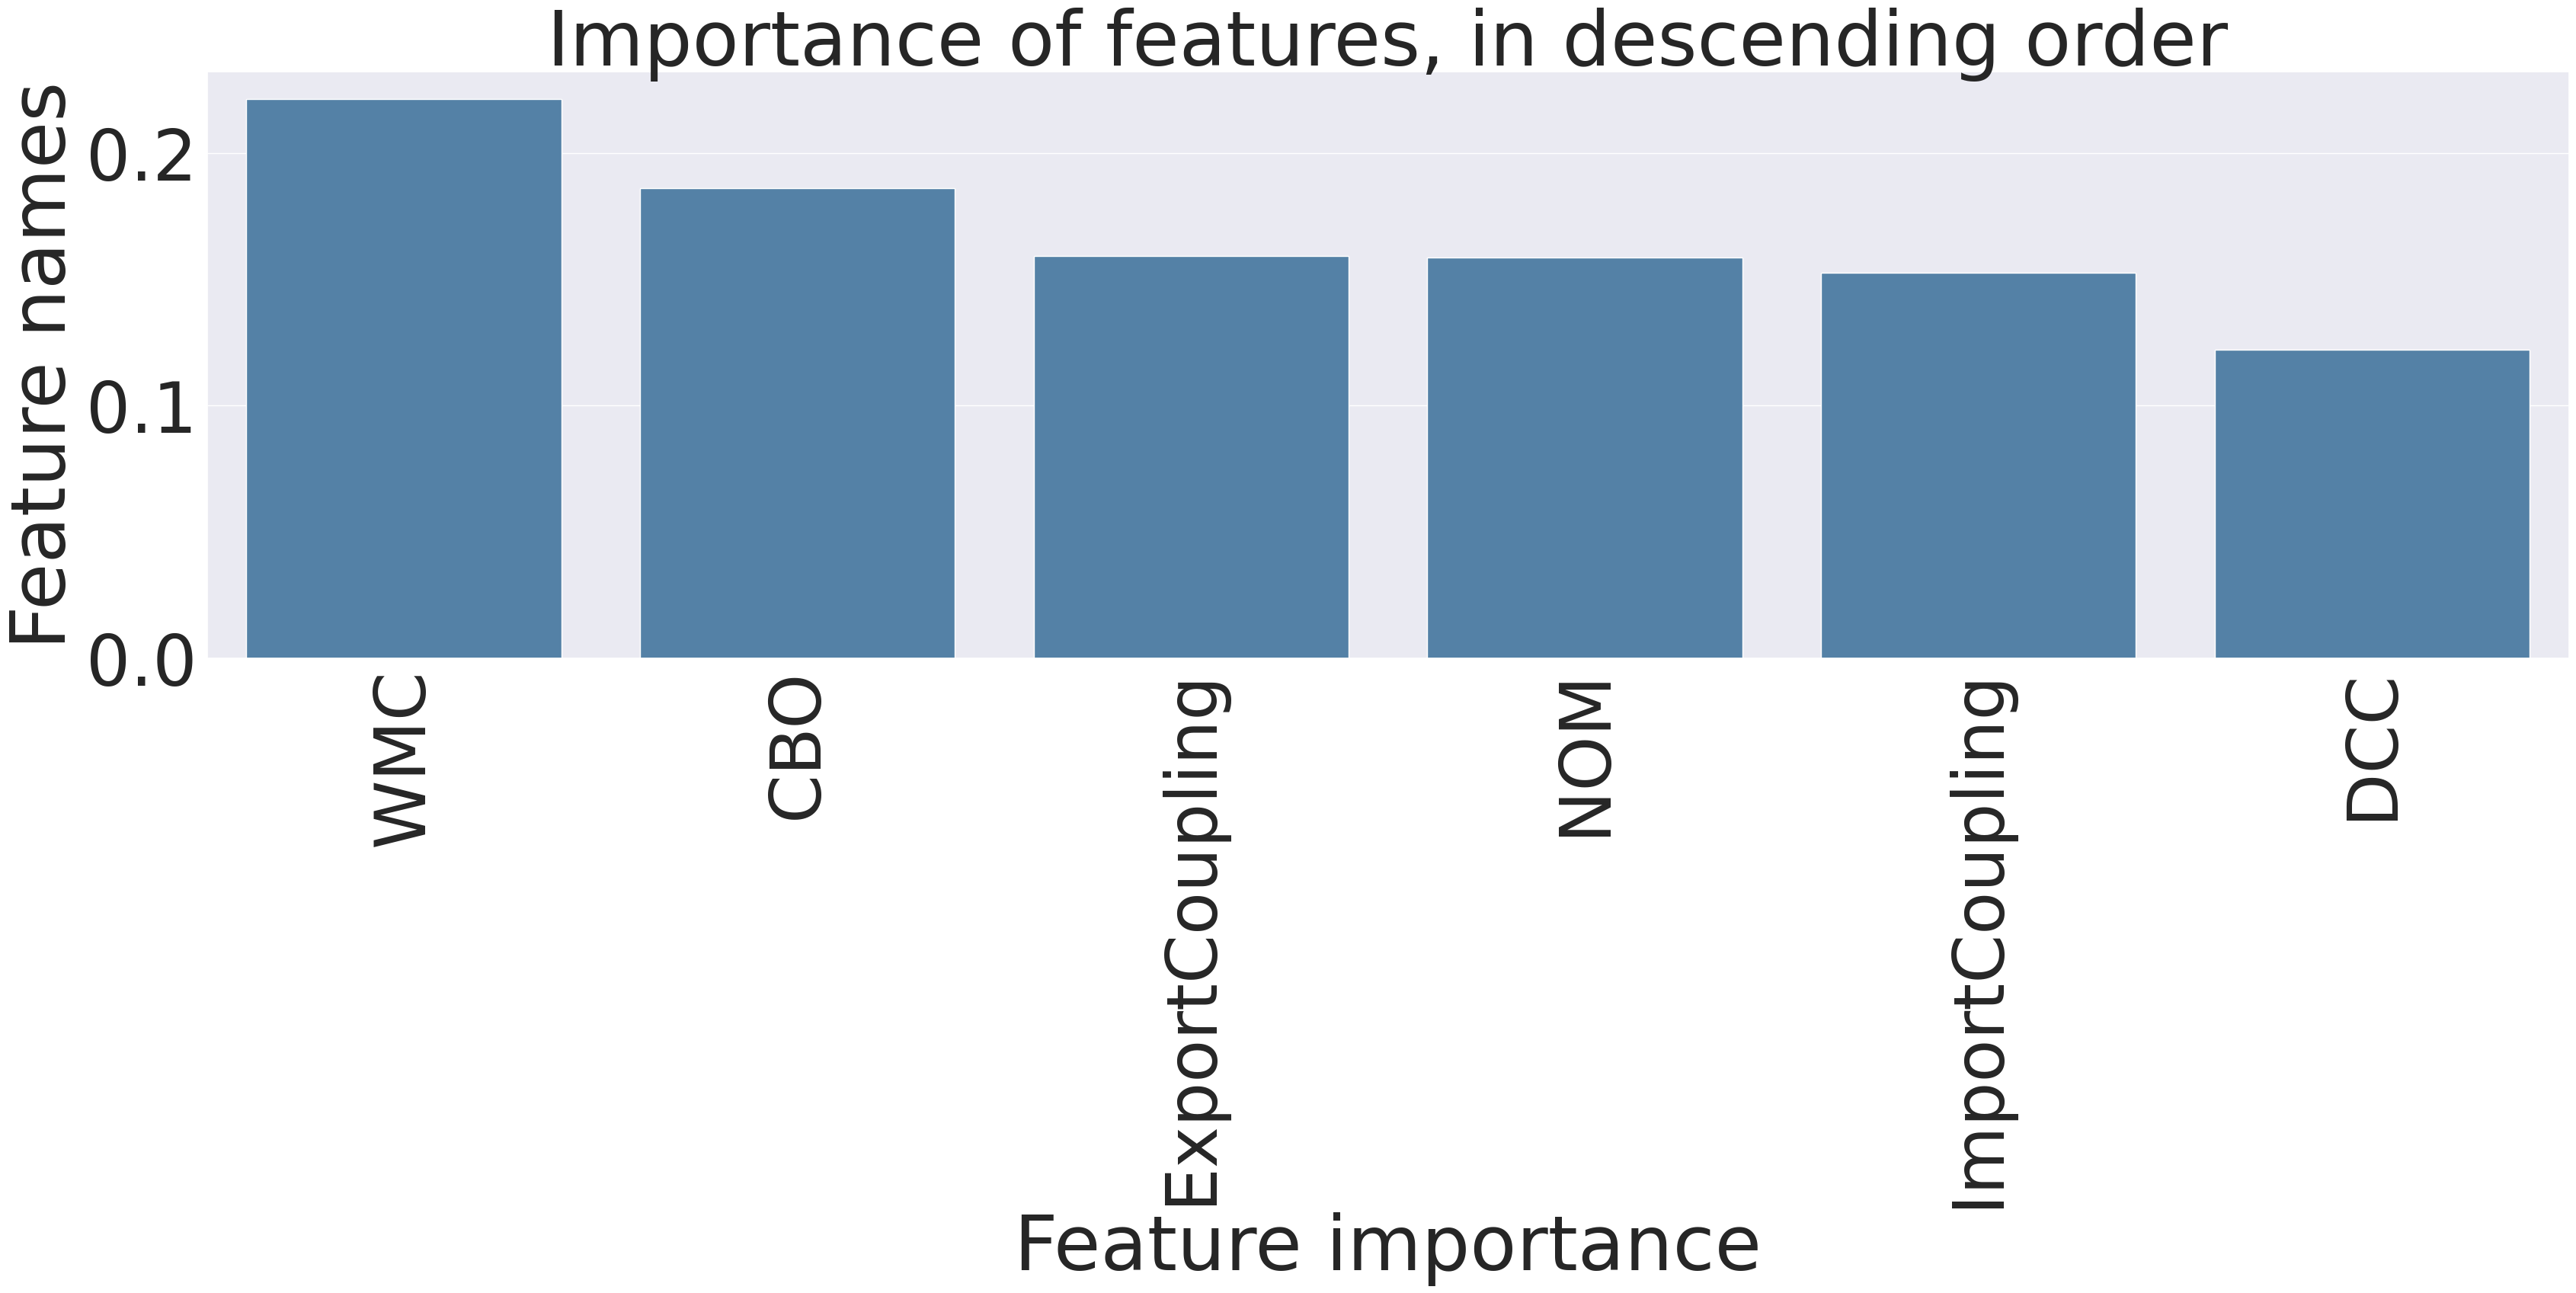

In [10]:
# we use matplotlib and seaborn to make the plot
import matplotlib.pyplot as plt
import seaborn as sns

# Define size of bar plot
# We make the x axis quite much larger than the y-axis since
# there is a lot of features to visualize
plt.figure(figsize=(40,10))

# plot Searborn bar chart
# we just use the blue color
sns.barplot(y=dfOnlyImportant['importance'], 
            x=dfOnlyImportant.index, 
            color='steelblue')

# we make the x-labels rotated so that we can fit
# all the features
plt.xticks(rotation=90)

sns.set(font_scale=6)

# add chart labels
plt.title('Importance of features, in descending order')
plt.xlabel('Feature importance')
plt.ylabel('Feature names')

# Neural networks

The demo below shows how we can use neural networks in PyTorch to achieve the same results - training on the Camel data.

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define the hyperparameters
input_size = X_train.shape[1]  # Number of input features
hidden_size = 64              # Number of neurons in the hidden layer
num_classes = 2               # Number of output classes

# Create an instance of the neural network
model = NeuralNetwork(input_size, hidden_size, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert the data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train.values)
y_train_tensor = torch.LongTensor(y_train.values)
X_test_tensor = torch.Tensor(X_test.values)

# Training the neural network
num_epochs = 10000
batch_size = 32
for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the loss at the end of each epoch
    if (epoch % 100 == 0):
      print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.3f}")

# Testing the neural network
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    y_pred_nn = predicted.numpy()


Epoch 1/10000, Loss: 0.773
Epoch 101/10000, Loss: 0.546
Epoch 201/10000, Loss: 0.446
Epoch 301/10000, Loss: 0.378
Epoch 401/10000, Loss: 0.332
Epoch 501/10000, Loss: 0.303
Epoch 601/10000, Loss: 0.278
Epoch 701/10000, Loss: 0.258
Epoch 801/10000, Loss: 0.244
Epoch 901/10000, Loss: 0.233
Epoch 1001/10000, Loss: 0.226
Epoch 1101/10000, Loss: 0.218
Epoch 1201/10000, Loss: 0.213
Epoch 1301/10000, Loss: 0.206
Epoch 1401/10000, Loss: 0.200
Epoch 1501/10000, Loss: 0.196
Epoch 1601/10000, Loss: 0.191
Epoch 1701/10000, Loss: 0.187
Epoch 1801/10000, Loss: 0.186
Epoch 1901/10000, Loss: 0.184
Epoch 2001/10000, Loss: 0.181
Epoch 2101/10000, Loss: 0.178
Epoch 2201/10000, Loss: 0.177
Epoch 2301/10000, Loss: 0.175
Epoch 2401/10000, Loss: 0.171
Epoch 2501/10000, Loss: 0.168
Epoch 2601/10000, Loss: 0.165
Epoch 2701/10000, Loss: 0.163
Epoch 2801/10000, Loss: 0.160
Epoch 2901/10000, Loss: 0.159
Epoch 3001/10000, Loss: 0.153
Epoch 3101/10000, Loss: 0.149
Epoch 3201/10000, Loss: 0.146
Epoch 3301/10000, Loss

In [17]:
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    X_test_tensor = torch.Tensor(X_test.values)
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    y_pred_nn = predicted.numpy()

In [19]:
# now, let's evaluate the code
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print(f'Accuracy: {accuracy_score(y_test, y_pred_nn):.2f}')
print(f'Precision: {precision_score(y_test, y_pred_nn, average="weighted"):.2f}, Recall: {recall_score(y_test, y_pred_nn, average="weighted"):.2f}')

Accuracy: 0.73
Precision: 0.79, Recall: 0.73


# Data leak

The following code illustrates a mistake when we use parts of the same data to both train and test the model. This problem is called the data leak problem, as we have the same data leaking from training to validation.

In [20]:
# first, we need to prepare the data that can leak
# for this, we use the split function with different parameters
# we use 20% of the data to test the model
# which means that at least 10% of the data is the same as in the training set
X_trainL, X_testL, y_trainL, y_testL = \
        sklearn.model_selection.train_test_split(X, y, random_state=42, train_size=0.8)

In [21]:
# now, let's evaluate the model on this new data
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    X_test_tensor = torch.Tensor(X_testL.values)
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    y_pred_nn = predicted.numpy()

In [23]:
# now, let's evaluate the code
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print(f'Accuracy: {accuracy_score(y_testL, y_pred_nn):.2f}')
print(f'Precision: {precision_score(y_testL, y_pred_nn, average="weighted"):.2f}, Recall: {recall_score(y_testL, y_pred_nn, average="weighted"):.2f}')

Accuracy: 0.85
Precision: 0.86, Recall: 0.85
